In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


In [ ]:
DATA_X = torch.arange(0, 100, 1)
M = 2
C = 5
DATA_Y = M * DATA_X + C


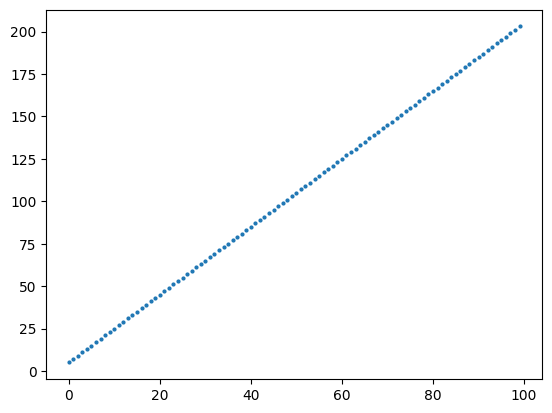

In [ ]:
plt.scatter(DATA_X, DATA_Y, s = 4)

In [ ]:
split = 0.8*len(DATA_X)
train_x = DATA_X[:int(split)]
train_y = DATA_Y[:int(split)]
test_x = DATA_X[int(split):]
test_y = DATA_Y[int(split):]

test_x.to(device)
test_y.to(device)
train_x.to(device)
train_y.to(device)

tensor([  5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,
         33,  35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,
         61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,
         89,  91,  93,  95,  97,  99, 101, 103, 105, 107, 109, 111, 113, 115,
        117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143,
        145, 147, 149, 151, 153, 155, 157, 159, 161, 163])

In [ ]:
def plot_predictions(train_x = train_x, train_y = train_y, test_x = test_x, test_y = test_y, predictions = None):
    plt.scatter(train_x, train_y, s = 4, c = 'b', label = 'Training_data')
    plt.scatter(test_x, test_y, s = 4, c = 'g',label = "Testing_data")
    if predictions is not None:
        plt.scatter(test_x, predictions, s = 4, c = 'r', label = 'Predected_test_data')
    plt.legend()


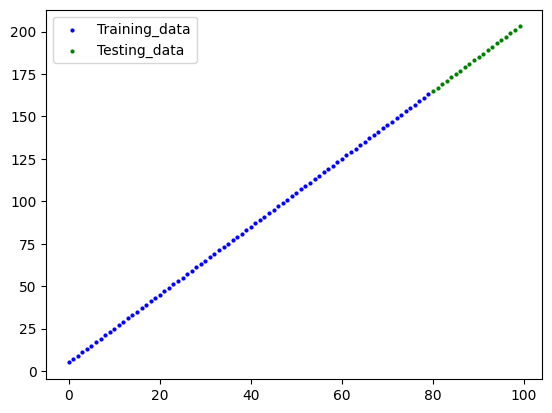

In [ ]:
plot_predictions()

In [ ]:
class LinearRegression(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)
  def forward(self, x):
    return self.linear(x)


In [ ]:
torch.manual_seed(42)
model = LinearRegression()
test_x = test_x.to(dtype = torch.float32)
test_x.unsqueeze_(dim = 1)
test_y = test_y.to(dtype = torch.float32)
test_y.unsqueeze_(dim = 1)
train_x = train_x.to(dtype = torch.float32)
train_x.unsqueeze_(dim = 1)
train_y = train_y.to(dtype = torch.float32)
train_y.unsqueeze_(dim = 1)
model.to(device)



LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
  y_preds = model(test_x)

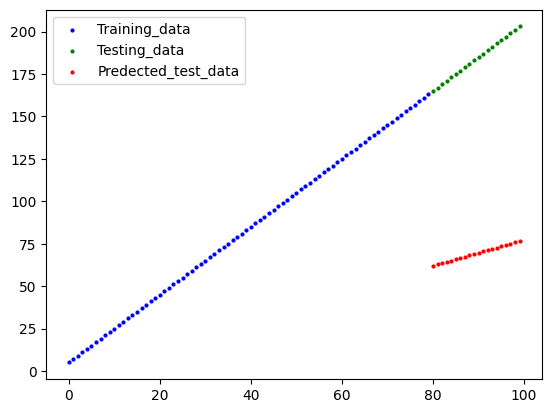

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.001)




In [ ]:
epoches = 10000
train_loss_arr = []
test_loss_arr = []
for epoch in range(epoches):
  #training
  model.train()

  y_pred = model(train_x)

  loss = loss_fn(y_pred, train_y)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()


  #testing

  model.eval()
  with torch.inference_mode():
    test_pred = model(test_x)
    test_loss = loss_fn(test_pred, test_y)

    if epoch%1000 == 0:

      test_loss_arr.append(test_loss.detach().numpy())
      train_loss_arr.append(loss.detach().numpy())
      print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")




Epoch: 0 | Loss: 52.97072219848633 | Test_loss: 111.20755767822266
Epoch: 1000 | Loss: 1.5601390600204468 | Test_loss: 2.206148624420166
Epoch: 2000 | Loss: 1.385550618171692 | Test_loss: 1.9676430225372314
Epoch: 3000 | Loss: 1.2108194828033447 | Test_loss: 1.6486457586288452
Epoch: 4000 | Loss: 1.0365010499954224 | Test_loss: 1.4175300598144531
Epoch: 5000 | Loss: 0.8909408450126648 | Test_loss: 1.9214508533477783
Epoch: 6000 | Loss: 0.774909496307373 | Test_loss: 2.6165642738342285
Epoch: 7000 | Loss: 0.7108324766159058 | Test_loss: 3.6246612071990967
Epoch: 8000 | Loss: 0.6536127924919128 | Test_loss: 3.3748908042907715
Epoch: 9000 | Loss: 0.46181535720825195 | Test_loss: 3.4895071983337402


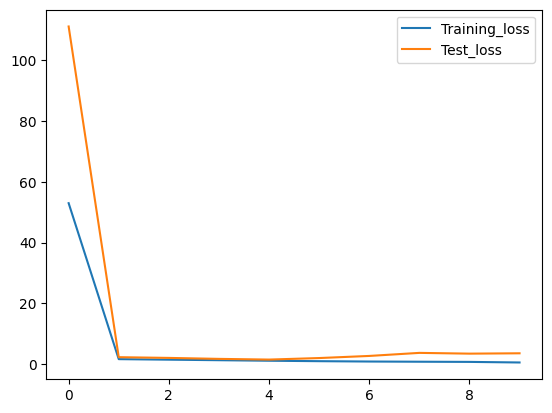

In [ ]:
plt.plot(train_loss_arr, label = 'Training_loss')
plt.plot(test_loss_arr, label = 'Test_loss')
plt.legend()

In [ ]:
with torch.inference_mode():
  y_pred = model(test_x)

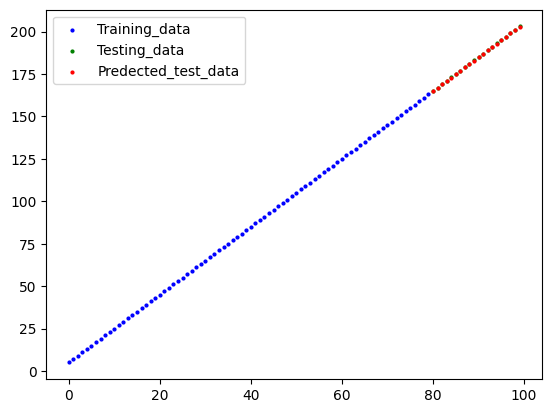

In [ ]:
plot_predictions(predictions = y_pred)